In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression

In [173]:
df = pd.read_csv('player_stats_1976-2019.csv', encoding = "UTF-8")

In [174]:
idx = []
for i in range(1, len(df)):
    if df.at[i,'Player'] == df.at[(i-1),'Player']:
        idx.append(i)
df = df.drop(idx)

In [197]:
players_next_season = df.loc[df['year'] == 2019]

In [176]:
def find_peers(player):
    player_row = players_next_season.loc[players_next_season['Player'] == player]
    age = player_row['Age'].item()
    peers = df.loc[df['Age'] == age].reset_index(drop=True)
    return peers

In [195]:
def find_comps(player):
    df = find_peers(player)
    ids_ = df[['Player', 'year']]
    df = df.drop(['Player', 'Tm', 'year'], axis = 1)
    df = pd.get_dummies(df, columns = ['Pos'])
    cs = cosine_similarity(df)
    
    comps = []
    idx = ids_.loc[ids_['Player'] == player].index[0]
    scores = pd.Series(cs[idx]).sort_values(ascending = False)
    
    
    top_300 = list(scores.iloc[1:301].index)
    for i in top_300:
        if ids_.loc[i][0] != player:
            comps.append((ids_.loc[i][0], ids_.loc[i][1], round(scores.loc[i], 5)))
    return comps

In [196]:
def display(player):
    x = []
    y = []
    
    for comp in find_comps(player):
        try:
            year2 = df.loc[(df['Player'] == comp[0]) & (df['year'] == (comp[1]+1))]
            year1 = df.loc[(df['Player'] == comp[0]) & (df['year'] == comp[1])]
            y.append(year2['BPM'].item())
            x.append(year1['BPM'].item())
        except:
            pass
        
    x = np.array(x)
    x = x.reshape(-1, 1)
    y = pd.Series(y)

    reg = LinearRegression().fit(x,y)
    y_pred = reg.predict(x)
    
    previous_row = df.loc[(df['Player'] == 'Derrick Rose') & (df['year'] == 2019)]
    previous_bpm = previous_row['BPM'].item()
    bpm_pred = round(reg.predict(np.array(previous_bpm).reshape(-1,1)).item(),5)
    
    print(f'We predict that {player} will have a Box Plus Minus of {bpm_pred} next year.')
    print('Top Comparisons:')
    for comp in list_comps(player)[1:6]:
        print(f'Name: {comp[0]}    Year: {comp[1]}    Sim Score: {comp[2]} \n')
        
    plt.scatter(x,y)
    plt.plot(x, y_pred, color = 'black')
    plt.show()

We predict that Rajon Rondo will have a Box Plus Minus of -1.53204 next year.
Top Comparisons:
Name: Mookie Blaylock    Year: 2000    Sim Score: 0.9936 

Name: Mark Jackson    Year: 1998    Sim Score: 0.99355 

Name: Marcelo Huertas    Year: 2016    Sim Score: 0.99291 

Name: Anthony Carter    Year: 2008    Sim Score: 0.9917 

Name: Baron Davis    Year: 2012    Sim Score: 0.99088 



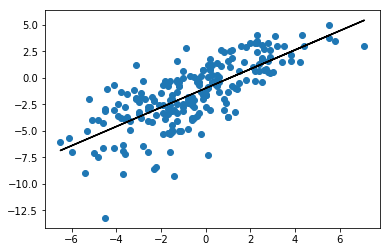

In [194]:
display('Rajon Rondo')